<a href="https://colab.research.google.com/github/benji555-create/Data-Science/blob/main/Benj_GaskU4Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm

We have to download basketball data from the unit 1 notes.

In [2]:
url_basketball = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/basketball2324.csv'
basketball = pd.read_csv(url_basketball)
basketball

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,0.501,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01
570,Cody Zeller,C,31,NOP,43,0,320,26,62,0.419,...,48,64,112,39,9,5,16,45,76,zelleco01


In [ ]:
data = pd.read_csv(url_basketball, dtype={'Pos': 'category'})
data = data[['Player', 'Pos', 'FG%', 'MP']]
data

,Player,Pos,FG%,MP
0,Precious Achiuwa,PF-C,0.501,1624
1,Bam Adebayo,C,0.521,2416
2,Ochai Agbaji,SG,0.411,1641
3,Santi Aldama,PF,0.435,1618
4,Nickeil Alexander-Walker,SG,0.439,1921
...,...,...,...,...
567,Thaddeus Young,PF,0.602,439
568,Trae Young,PG,0.430,1942
569,Omer Yurtseven,C,0.538,545
570,Cody Zeller,C,0.419,320


Now we have to narrow down the data to just the columns we want, Position and FG%. I'm also keeping player names out of my own interest.
**Edit**
I'm keeping MP so I can narrow down the data later.

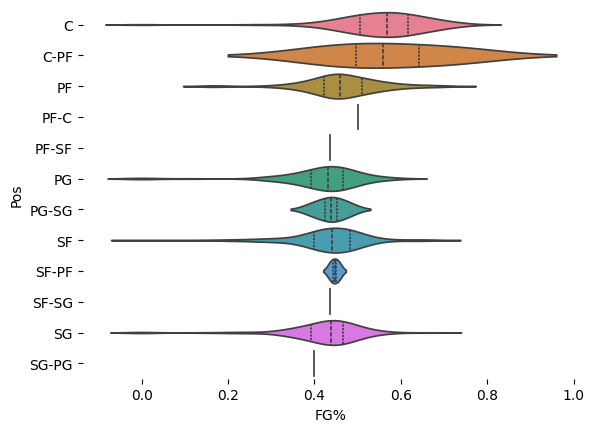

In [ ]:
sns.violinplot(data, x='FG%', y='Pos', inner='quart', hue='Pos')
sns.despine(top=True, right=True, bottom=True, left=True)

The violin plot shows that C-PF, C, and PF seem to have the highest mean and range, while all of the guard and wing positions have lower FG%.

In an attempt to get rid of outliers and make this plot a little prettier, I've decided to remove all players shooting 0% from the field and all players who played less than 200 minutes on the season.

In [ ]:
dataNew = data.query('`FG%` != 0 and MP>300')
dataNew

,Player,Pos,FG%,MP
0,Precious Achiuwa,PF-C,0.501,1624
1,Bam Adebayo,C,0.521,2416
2,Ochai Agbaji,SG,0.411,1641
3,Santi Aldama,PF,0.435,1618
4,Nickeil Alexander-Walker,SG,0.439,1921
...,...,...,...,...
567,Thaddeus Young,PF,0.602,439
568,Trae Young,PG,0.430,1942
569,Omer Yurtseven,C,0.538,545
570,Cody Zeller,C,0.419,320


With these cleaner data set, I'm going to make a new violin plot and finish my project using this set.

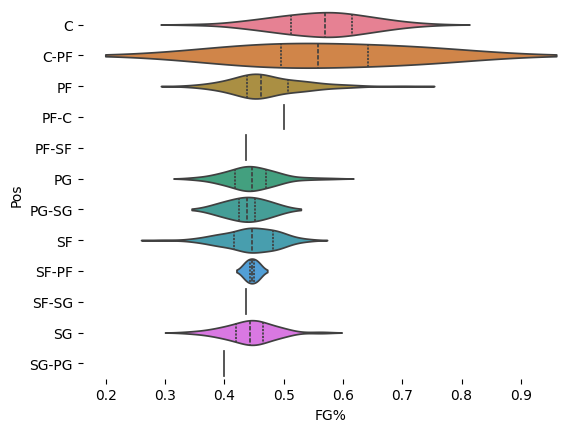

In [ ]:
sns.violinplot(dataNew, x='FG%', y='Pos', inner='quart', hue='Pos')
sns.despine(top=True, right=True, bottom=True, left=True)

This new violin plot shows even more how big men shoot higher percentages than wings and guards, with C-PF and C having much higher means than all other positions.

In [ ]:
pos_idx = dataNew.Pos.cat.codes.values

#an array of the four strings that represent position
pos_codes = dataNew.Pos.cat.categories

#puts coords in a dict, so pymc can read them
basketball_coords = {"pos": pos_codes}

In [ ]:
pos_idx

array([ 3,  0, 10,  2, 10, 10,  0,  5,  2,  2,  5,  7,  7,  0,  0,  7,  5,
        0,  2, 10,  5,  2,  2, 10, 10,  7,  2, 10, 10,  7,  2,  5,  7,  0,
        0,  5, 10,  8,  2,  5,  7,  2,  5, 10,  7,  7,  7,  5,  7,  6,  7,
        2,  7,  5,  0,  7, 10, 10,  2, 10,  2,  0,  5,  0, 10,  7, 10, 10,
        0,  2,  7,  2,  0,  5,  7,  7,  8,  7,  2,  5, 10,  5,  5,  0, 10,
        7, 10,  2,  5, 10,  5,  7, 10,  0,  7,  5,  2,  0,  2, 10, 10,  0,
        0,  7,  5,  0,  2,  5,  7, 10, 10,  5,  5,  5,  1,  4,  5,  5,  2,
       10,  5,  2,  5,  0,  5,  2, 10,  5,  2, 10,  2, 10,  2, 10, 10,  2,
        5,  5,  7,  5, 10, 10,  2,  7,  0,  7, 10,  0,  5,  7,  5,  2, 10,
        9,  2,  5,  5, 10,  1,  0,  0,  5,  7,  7, 10,  7,  5,  7,  7, 10,
        2, 10, 10,  2,  0,  0,  5,  2,  2,  7,  0, 10,  2,  7,  7,  0,  7,
        7,  5,  5,  0,  2, 10, 10,  0,  7,  0,  7,  7,  0,  5,  2,  2,  0,
        2, 10, 10,  0,  7, 10,  5,  7,  0,  2,  0,  0,  2,  5,  2,  0, 10,
        5,  2,  7,  7,  7

In [ ]:
pos_codes

Index(['C', 'C-PF', 'PF', 'PF-C', 'PF-SF', 'PG', 'PG-SG', 'SF', 'SF-PF',
       'SF-SG', 'SG', 'SG-PG'],
      dtype='object')

In [ ]:
basketball_coords

{'pos': Index(['C', 'C-PF', 'PF', 'PF-C', 'PF-SF', 'PG', 'PG-SG', 'SF', 'SF-PF',
        'SF-SG', 'SG', 'SG-PG'],
       dtype='object')}

In [ ]:
with pm.Model(coords = basketball_coords) as bask_n_model:

    μ_mu = pm.Normal('μ_mu', mu = 0, sigma = 300)
    μ_sd = pm.HalfNormal('μ_sd', sigma = 30)


    μ = pm.Normal('μ',
                  mu = μ_mu,
                  sigma = μ_sd)

    σ = pm.HalfNormal('σ', sigma = 10)

    α = pm.Exponential('α', lam = 5)


    _ = pm.SkewNormal('Pos', mu = μ, sigma = σ, alpha = α, observed = dataNew["FG%"])


    idata_bball = pm.sample(target_accept = 0.95)

Sampling chain 1, 45 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:23

ERROR:pymc.stats.convergence:There were 59 divergences after tuning. Increase `target_accept` or reparameterize.


Lost of divergences, yikes.

Sampling ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:00

<Axes: xlabel='Pos'>

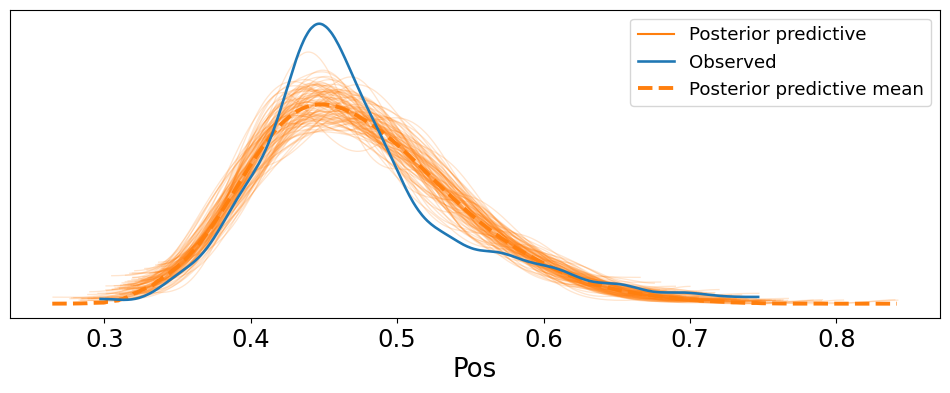

In [ ]:
pm.sample_posterior_predictive(idata_bball, model=bask_n_model, extend_inferencedata=True)
az.plot_ppc(idata_bball, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Even with all the divergences, it matches up pretty well. I'm gong to increase the target accept to lower the divergences and then move on.

In [ ]:
with pm.Model(coords = basketball_coords) as bask_n1_model:

    μ_mu = pm.Normal('μ_mu', mu = 0, sigma = 300)
    μ_sd = pm.HalfNormal('μ_sd', sigma = 30)


    μ = pm.Normal('μ',
                  mu = μ_mu,
                  sigma = μ_sd)

    σ = pm.HalfNormal('σ', sigma = 10)

    α = pm.Exponential('α', lam = 5)


    _ = pm.SkewNormal('Pos', mu = μ, sigma = σ, alpha = α, observed = dataNew["FG%"])


    idata_bball = pm.sample(target_accept = 1.00)

Sampling chain 1, 1 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:02:07

ERROR:pymc.stats.convergence:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


Sampling ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:00

<Axes: xlabel='Pos'>

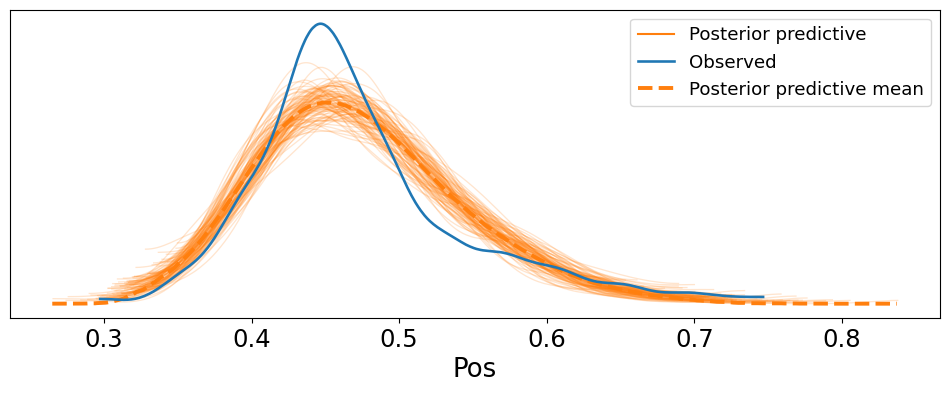

In [ ]:
pm.sample_posterior_predictive(idata_bball, model=bask_n1_model, extend_inferencedata=True)
az.plot_ppc(idata_bball, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

In [ ]:

with pm.Model(coords=basketball_coords) as ball1_model:
    #priors
    #dims="aa" means to apply the prior seperately to each amino acid
    μ = pm.Normal('μ', mu=0, sigma=10, dims='Pos'
                  )
    σ = pm.HalfNormal('σ', sigma=10, dims='Pos'
                      )

    #The idx variable tells my model which diffs belong to the same amino acid
    #this will cause my model to generate a posterior for each amino acid
    y = pm.Normal('y',
                  mu = μ[pos_idx],
                  sigma = σ[pos_idx],
                  observed=dataNew["FG%"])

    #cs for chemshift, nh for nonheirarchical
    idata_bball = pm.sample()

IndexError: too many indices for array

Much less divergences, and the model still looks good.

<xarray.Dataset> Size: 40B
Dimensions:  ()
Data variables:
    α        float64 8B 1.002
    μ        float64 8B 1.001
    μ_mu     float64 8B 1.005
    μ_sd     float64 8B 1.004
    σ        float64 8B 1.001

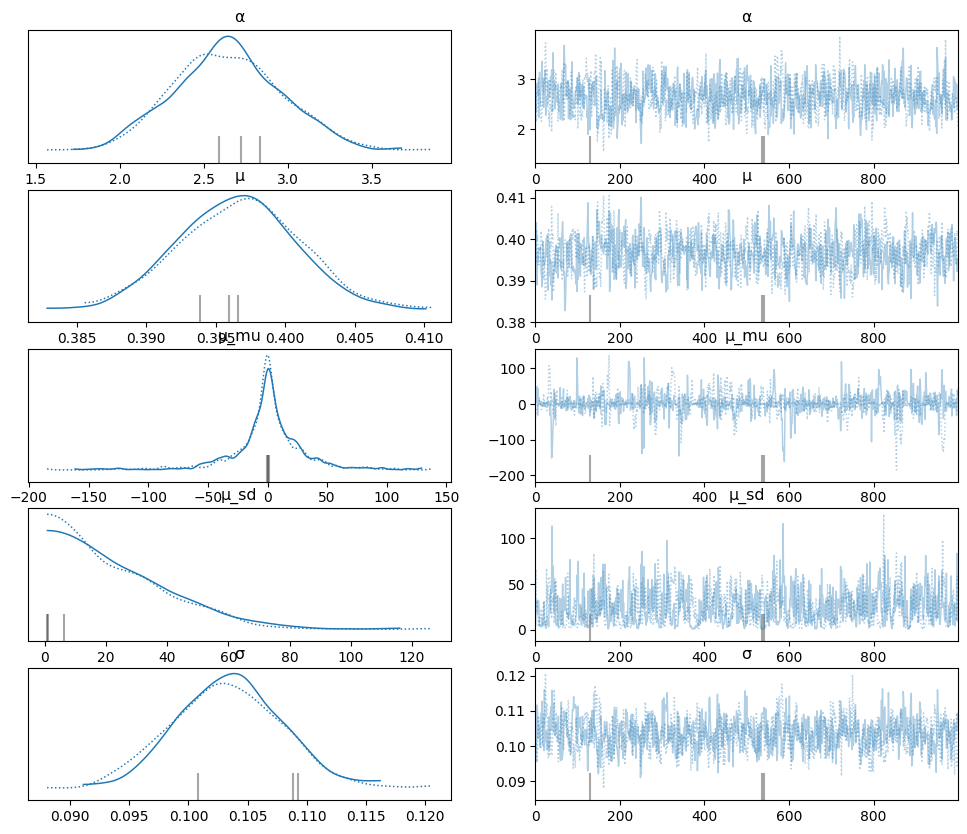

In [ ]:
az.plot_trace(idata_bball)
az.rhat(idata_bball)

array([<Axes: >], dtype=object)

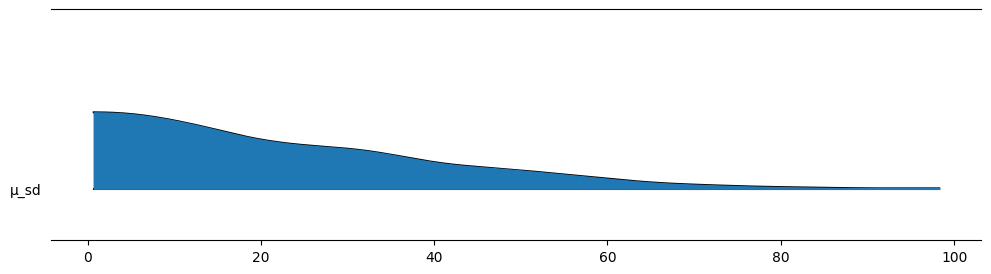

In [ ]:
az.plot_forest(idata_bball, var_names=['μ_sd'], combined=True, figsize=(12, 3), kind = 'ridgeplot', hdi_prob=0.998)

This sucks. I'm doing something else because this hasn't worked for soooooo much time. I'm swithcing to checking assist numbers.

In [3]:
dataPass = pd.read_csv(url_basketball, dtype={'Pos': 'category'})
dataPass = dataPass[['Player', 'Pos', 'AST', 'MP']]
dataPass

,Player,Pos,AST,MP
0,Precious Achiuwa,PF-C,97,1624
1,Bam Adebayo,C,278,2416
2,Ochai Agbaji,SG,83,1641
3,Santi Aldama,PF,138,1618
4,Nickeil Alexander-Walker,SG,204,1921
...,...,...,...,...
567,Thaddeus Young,PF,57,439
568,Trae Young,PG,583,1942
569,Omer Yurtseven,C,29,545
570,Cody Zeller,C,39,320


In [4]:
dataNewPass = dataPass.query('AST != 0 and MP>300')
dataNewPass

,Player,Pos,AST,MP
0,Precious Achiuwa,PF-C,97,1624
1,Bam Adebayo,C,278,2416
2,Ochai Agbaji,SG,83,1641
3,Santi Aldama,PF,138,1618
4,Nickeil Alexander-Walker,SG,204,1921
...,...,...,...,...
567,Thaddeus Young,PF,57,439
568,Trae Young,PG,583,1942
569,Omer Yurtseven,C,29,545
570,Cody Zeller,C,39,320


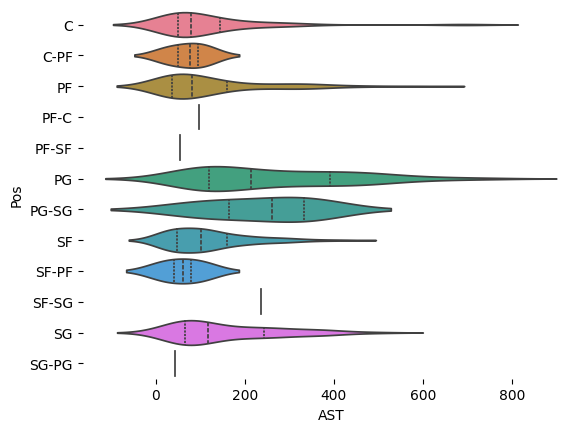

In [5]:
sns.violinplot(dataNewPass, x='AST', y='Pos', inner='quart', hue='Pos')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
pos_idx = dataNewPass.Pos.cat.codes.values

#an array of the four strings that represent position
pos_codes = dataNewPass.Pos.cat.categories

#puts coords in a dict, so pymc can read them
basketball_coords = {"pos": pos_codes}

In [10]:
with pm.Model(coords = basketball_coords) as bask_n_model:

    μ_mu = pm.Normal('μ_mu', mu = 0, sigma = 300)
    μ_sd = pm.HalfNormal('μ_sd', sigma = 30)


    μ = pm.Normal('μ',
                  mu = μ_mu,
                  sigma = μ_sd)

    σ = pm.HalfNormal('σ', sigma = 10)

    α = pm.Exponential('α', lam = 5)


    _ = pm.SkewNormal('Pos', mu = μ, sigma = σ, alpha = α, observed = dataNewPass.AST)


    idata_bball = pm.sample(target_accept = 1.00)

Output()

Output()

<xarray.Dataset> Size: 40B
Dimensions:  ()
Data variables:
    α        float64 8B 1.0
    μ        float64 8B 1.002
    μ_mu     float64 8B 1.004
    μ_sd     float64 8B 1.0
    σ        float64 8B 1.0

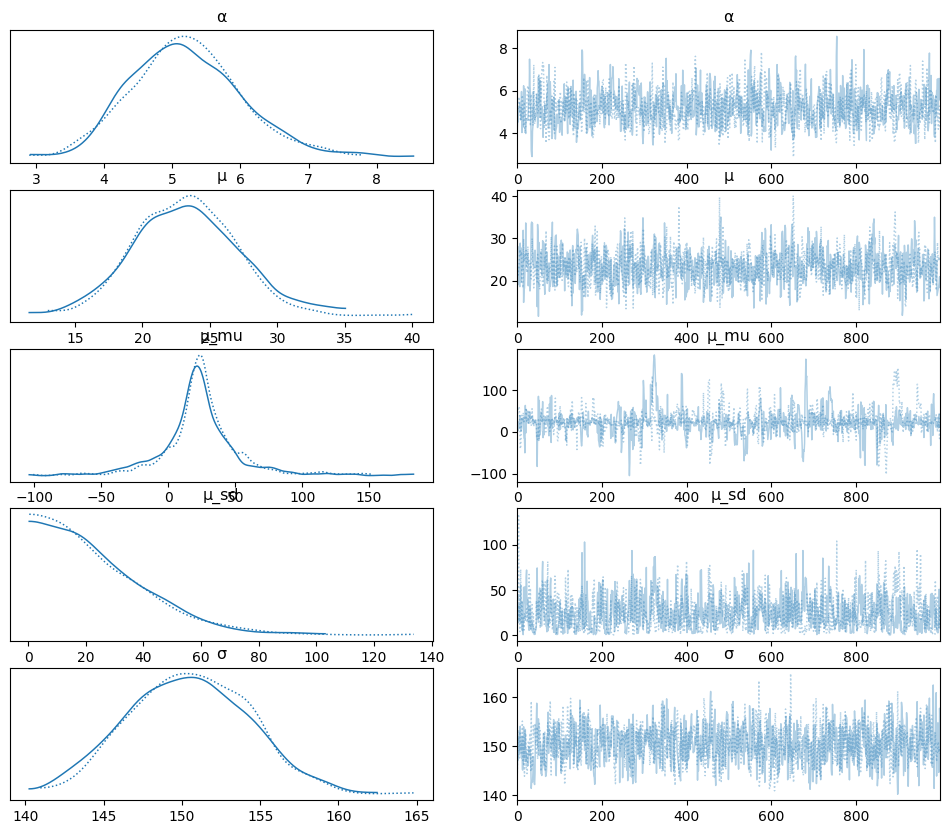

In [12]:
az.plot_trace(idata_bball)
az.rhat(idata_bball)

In [22]:
with pm.Model(coords = basketball_coords) as basketball_model:
    #hyperpriors
    a = pm.Gamma('a', alpha = 50, beta = 10)
    b = pm.Gamma('b', alpha = 10, beta = 50)

    #priors
    λ = pm.Gamma('λ', alpha = a, beta = b, dims = "pos")

    #exponential likelihood
    _ = pm.Exponential('pos', lam = λ[pos_idx], observed = dataNewPass.AST)

    #target_accept has a default of 0.8. Increasing it makes us less likely to have divergences
    idata_bballs = pm.sample(target_accept = 0.95)

Output()

Output()

Output()

<Axes: xlabel='pos'>

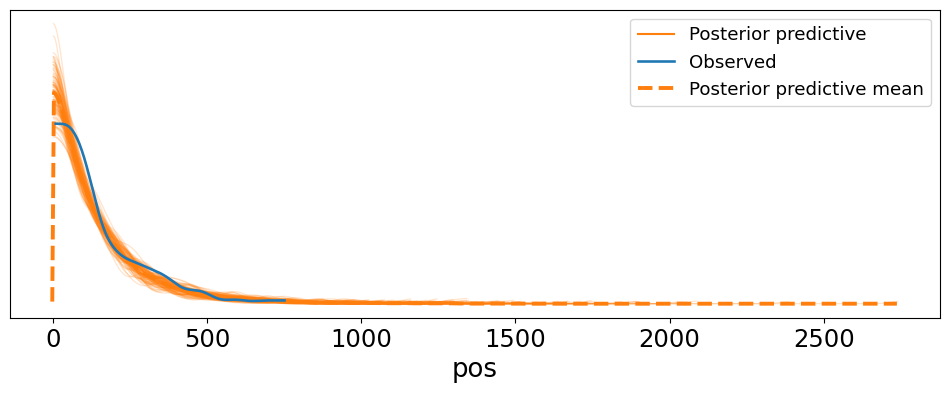

In [25]:
pm.sample_posterior_predictive(idata_bballs, model=basketball_model, extend_inferencedata=True)
az.plot_ppc(idata_bballs, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Fits perfectly.

<xarray.Dataset> Size: 352B
Dimensions:  (pos: 12)
Coordinates:
  * pos      (pos) <U5 240B 'C' 'C-PF' 'PF' 'PF-C' ... 'SF-SG' 'SG' 'SG-PG'
Data variables:
    a        float64 8B 1.001
    b        float64 8B 1.001
    λ        (pos) float64 96B 1.001 1.001 1.001 1.001 ... 1.001 1.0 1.001 1.001

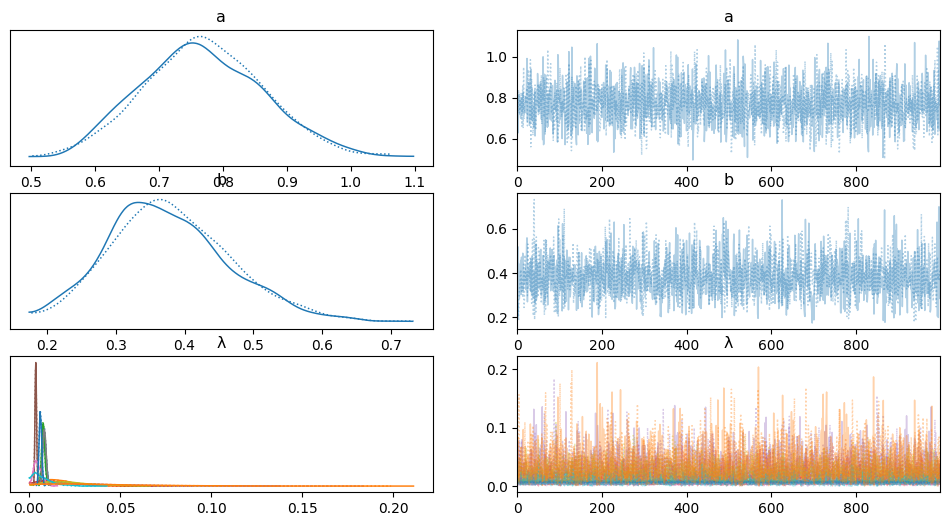

In [23]:
az.plot_trace(idata_bballs)
az.rhat(idata_bballs)

array([<Axes: >], dtype=object)

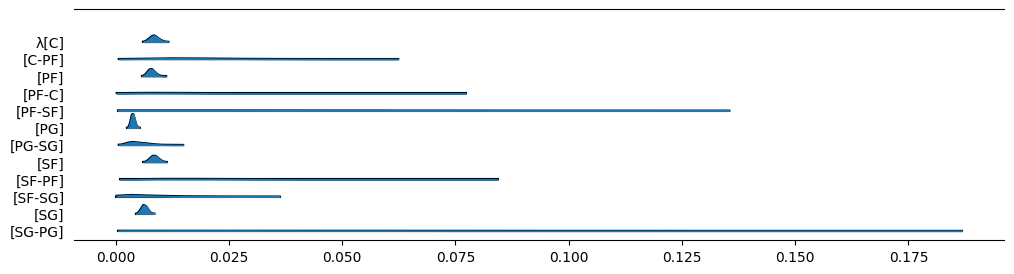

In [24]:
az.plot_forest(idata_bballs, var_names=['λ'], combined=True, figsize=(12, 3), kind = 'ridgeplot', hdi_prob=0.998)

In [27]:
posterior = idata_bballs.posterior
lambda_variable = posterior['λ']
mean_lambda = lambda_variable.mean(dim=['chain', 'draw'])
mean_array = mean_lambda.values



reciprocal_array = []
for value in mean_array:
    reciprocal = 1 / value
    reciprocal_array.append(reciprocal)


for i in range(len(pos_codes)):
    position = pos_codes[i]
    reciprocal = reciprocal_array[i]
    print(f'{position}: {reciprocal}')

C: 117.4488936576326
C-PF: 57.00828490967361
PF: 126.30006899579583
PF-C: 54.86884676981639
PF-SF: 31.687998614095488
PG: 263.4998190776741
PG-SG: 199.002193806196
SF: 116.90044476715426
SF-PF: 43.169392942716726
SF-SG: 133.91641434130395
SG: 157.77157318184396
SG-PG: 24.834658047688777


THe assist numbers gradulaly decrease as you can see from the model. PG average the most, SG follow, then interestingly PF then C. I believe this is because the ideal "superstar" position in the NBA is the SF, with many teams having their SF take the most shots and not have the burden of playmaking.